In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/smartphones.csv')

INR_TO_USD = 0.012  # taxa média aproximada
df['price_usd'] = df['price_inr'] * INR_TO_USD

df.head()


,smartphone_brand,model,price_inr,rating_score,processor_name,processor_brand,core_count,clock_speed_ghz,ram_gb,storage_gb,...,fast_charging,charging_watt,rear_camera_count,front_camera_count,rear_camera_main_mp,front_camera_main_mp,os_name,memory_card_supported,memory_card_type,price_usd
0,blackzone,BlackZone S25 Ultra Maxx,8999,63,unisoc sc9863a1,unisoc,8,1.6,8,128,...,False,10.0,1,1,32.0,16.0,android,NaN,NaN,107.988
1,ringme,Ringme Bold P70,5800,44,mediatek helio,mediatek,2,1.3,4,128,...,False,10.0,1,0,13.0,NaN,android,NaN,NaN,69.600
2,lava,Lava Shark 5G (4GB RAM + 128GB),8998,60,unisoc t765,unisoc,8,2.3,4,128,...,True,10.0,1,1,13.0,5.0,android,True,dedicated,107.976
3,vivo,Vivo Y19s 5G (4GB RAM + 128GB),11999,69,mediatek dimensity 6300,mediatek,8,2.4,4,128,...,True,15.0,2,1,13.0,5.0,android,True,dedicated,143.988
4,vivo,Vivo Y19s 5G (4GB RAM + 64GB),10999,68,mediatek dimensity 6300,mediatek,8,2.4,4,64,...,True,15.0,2,1,13.0,5.0,android,True,dedicated,131.988


In [3]:
bins = [0, 200, 400, 600, 800, 2000]

labels = [
    'Entry Level (up to $200)',
    'Mid-Range ($200–400)',
    'Upper Mid-Range ($400–600)',
    'Premium ($600–800)',
    'Flagship ($800+)'
]

df['price_segment'] = pd.cut(df['price_usd'], bins=bins, labels=labels)


In [4]:
df['value_score'] = (
    df['rating_score'] * 0.4 +
    (df['battery_mah'] / df['battery_mah'].max()) * 0.3 +
    (df['clock_speed_ghz'] / df['clock_speed_ghz'].max()) * 0.3
)

df[['value_score']].describe()


,value_score
count,758.000000
mean,31.685225
std,3.379134
min,14.915550
25%,29.831829
50%,32.240097
75%,33.838540
max,39.162264


In [5]:
top_smartphones = (
    df.sort_values('value_score', ascending=False)
      .groupby('price_segment')
      .head(5)
)

top_smartphones[
    ['smartphone_brand', 'model', 'price_usd', 'rating_score', 'value_score', 'price_segment']
]


C:\Users\jeffe\AppData\Local\Temp\ipykernel_28748\3406036210.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('price_segment')


,smartphone_brand,model,price_usd,rating_score,value_score,price_segment
9,ulefone,Ulefone Armor 29 Pro 5G,1038.000,96,38.874497,Flagship ($800+)
674,vivo,Vivo X Fold 3 Pro,1919.988,96,38.702137,Flagship ($800+)
537,vivo,Vivo X200 Pro 5G,959.988,95,38.328530,Flagship ($800+)
683,tecno,Tecno Phantom V Fold 2,1079.988,95,38.296133,Flagship ($800+)
294,samsung,Samsung Galaxy S25 Ultra (12GB RAM + 1TB),1991.988,94,37.970755,Flagship ($800+)
749,oneplus,OnePlus 13,767.988,91,36.774839,Premium ($600–800)
146,oppo,OPPO Reno 14 Pro 5G (12GB RAM + 512GB),683.988,91,36.705857,Premium ($600–800)
129,nothing,Nothing Phone 3 (16GB RAM + 512GB),683.988,91,36.692595,Premium ($600–800)
742,motorola,Motorola Razr 50 Ultra,661.560,91,36.657946,Premium ($600–800)
351,iqoo,iQOO 13 (16GB RAM + 512GB),719.988,90,36.374839,Premium ($600–800)


C:\Users\jeffe\AppData\Local\Temp\ipykernel_28748\1862461408.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('price_segment')['price_usd']


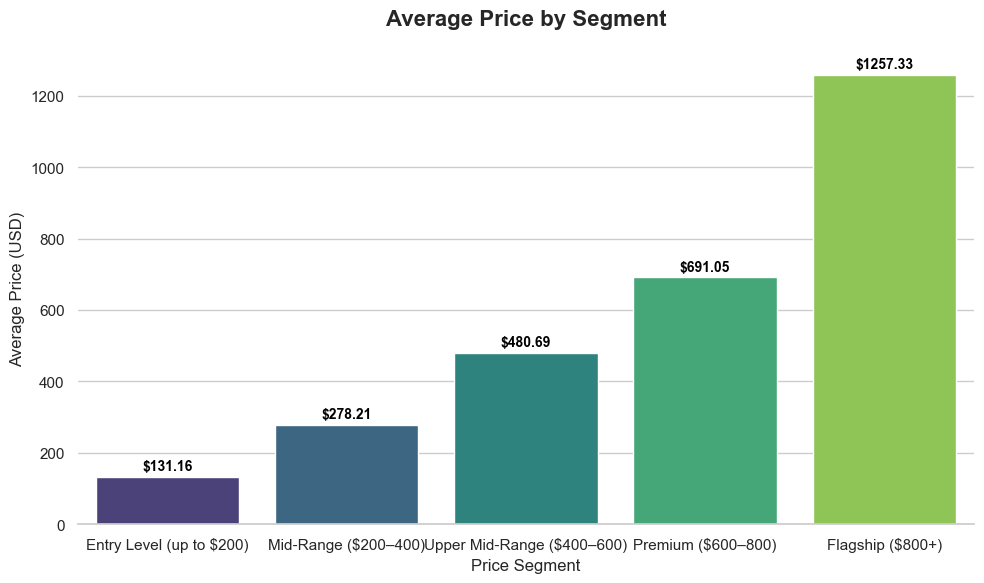

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

plot_data = (
    df.groupby('price_segment')['price_usd']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

ax = sns.barplot(
    data=plot_data,
    x='price_segment',
    y='price_usd',
    hue='price_segment',
    palette='viridis',
    legend=False
)

for p in ax.patches:
    ax.annotate(
        f'${p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='baseline',
        fontsize=10,
        fontweight='bold',
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Average Price by Segment', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Price (USD)', fontsize=12)
plt.xlabel('Price Segment', fontsize=12)
plt.xticks(rotation=0)

sns.despine(left=True)
plt.tight_layout()
plt.show()


The analysis shows a clear and consistent increase in average price across
segments, validating the segmentation strategy and confirming that higher-end
devices are strongly differentiated by price.
